This lab is focused on the Mandelbrot set that was discussed in the lecture. The goal is to produce
this image and to understand the algorithm for its generation:

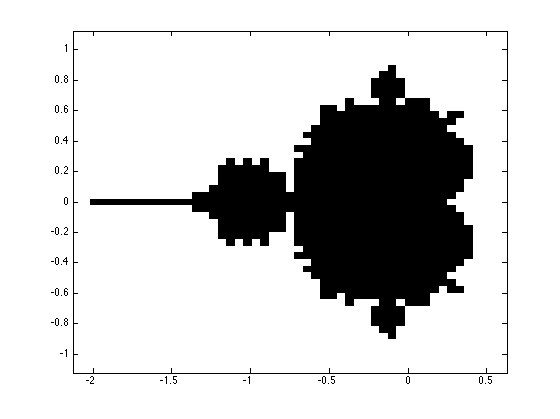

(1) The Mandelbrot set emerges from the super simple iteration formula $z_{n+1}=z^2_n+C$ where $C$
is a constant and one starts from $z_0=0$. Let us assume all numbers are real for the moment. For
what values of $C$ does this series diverge? To find out, please write a simple loop the computes $z_n$
up to $n_{max}=50$. Print all $z_n$. If $|z_n|$ exceeds $z_{limit}=50.0$ for any $n$, let us assume the series diverges.
For the following $C$ values, determine whether the series diverges or not. (We tried this in class
already.)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import prettytable as pt
from tqdm import trange

In [62]:
def testDiverge(C_Re, C_Im, n_max, z_limit, printZ):
    C = complex(C_Re, C_Im)
    z = 0.0j
    if printZ:
        print("z0 = ", z)
    for i in range(n_max):
        z = z * z + C
        if printZ:
            print('z{id} = {result}'.format(id = i + 1, result = z))

        if abs(z) > z_limit:
            return i
    return n_max

C_list = [-4, -2.001, -2, -1.999, -1, 0, 0.5, 1, 2]
n_max = 50
z_limit = 50

DivergeTable = pt.PrettyTable()
DivergeTable.field_names = ["C", "Diverges True/False"]

for C in C_list:
    print('-----------------------------------------------------')
    print('test for C = ',C)
    n = testDiverge(C, 0, n_max, z_limit, True)
    print('Diverge or not ? : ',n<n_max)
    DivergeTable.add_row([str(C), n<n_max])

-----------------------------------------------------
test for C =  -4
z0 =  0j
z1 = (-4+0j)
z2 = (12+0j)
z3 = (140+0j)
Diverge or not ? :  True
-----------------------------------------------------
test for C =  -2.001
z0 =  0j
z1 = (-2.001+0j)
z2 = (2.003001+0j)
z3 = (2.0110130060009994+0j)
z4 = (2.043173310305176+0j)
z5 = (2.173557175943412+0j)
z6 = (2.7233507970951005+0j)
z7 = (5.4156395640385195+0j)
z8 = (27.328151887579324+0j)
z9 = (744.8268855906053+0j)
Diverge or not ? :  True
-----------------------------------------------------
test for C =  -2
z0 =  0j
z1 = (-2+0j)
z2 = (2+0j)
z3 = (2+0j)
z4 = (2+0j)
z5 = (2+0j)
z6 = (2+0j)
z7 = (2+0j)
z8 = (2+0j)
z9 = (2+0j)
z10 = (2+0j)
z11 = (2+0j)
z12 = (2+0j)
z13 = (2+0j)
z14 = (2+0j)
z15 = (2+0j)
z16 = (2+0j)
z17 = (2+0j)
z18 = (2+0j)
z19 = (2+0j)
z20 = (2+0j)
z21 = (2+0j)
z22 = (2+0j)
z23 = (2+0j)
z24 = (2+0j)
z25 = (2+0j)
z26 = (2+0j)
z27 = (2+0j)
z28 = (2+0j)
z29 = (2+0j)
z30 = (2+0j)
z31 = (2+0j)
z32 = (2+0j)
z33 = (2+0j)
z34 = (2+

In [63]:
print(DivergeTable)

+--------+---------------------+
|   C    | Diverges True/False |
+--------+---------------------+
|   -4   |         True        |
| -2.001 |         True        |
|   -2   |        False        |
| -1.999 |        False        |
|   -1   |        False        |
|   0    |        False        |
|  0.5   |         True        |
|   1    |         True        |
|   2    |         True        |
+--------+---------------------+


(2) Now we want to convey in the information in this table in graphical form. Generate a fine grid of $C$ values from –4 to +2 and program a function f(C) that assume 1 or 0 depending on whether the series zn diverging or not. The generate a plot f(C) versus $C$. (You may not need to write a function f(C) as long as the plot is correct. Also this will be a somewhat boring graph but it is just a precursor to what is to come.)

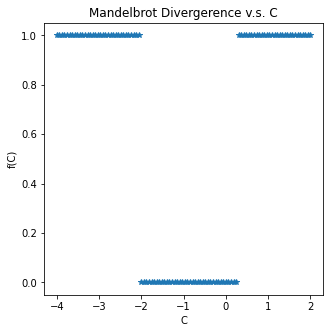

In [64]:
fine_grid_C_list = np.linspace(-4, 2, 100)
n_max = 50
z_limit = 50
plot_table = False

DivergeTable2 = pt.PrettyTable()
DivergeTable2.field_names = ["C", "Diverges True/False"]

x = []
y = []

for C in fine_grid_C_list:
    n = testDiverge(C, 0, n_max, z_limit, False)
    x.append(C)
    y.append(n<n_max)
    DivergeTable2.add_row([str(C), n<n_max])

if plot_table:
    print(DivergeTable2)

plt.plot(x, y, '*')
plt.xlabel('C')
plt.ylabel('f(C)')
plt.title('Mandelbrot Divergerence v.s. C')
plt.show()

In [65]:
C_Real_list = [-0.4, 0.4, -1.7, -1.7, -1.778, -1.778, -1.25, -1.25, -0.125, -0.125]
C_Image_list = [0.2, 0.6, 0, 0.001, 0, 0.001, 0, 0.04, -0.9, -0.85]
n_max = 50
z_limit = 50

DivergeTable3 = pt.PrettyTable()
DivergeTable3.field_names = ["C", "Diverges True/False"]

for i in range(len(C_Real_list)):
    n = testDiverge(C_Real_list[i], C_Image_list[i], n_max, z_limit, False)
    DivergeTable3.add_row([str(C_Real_list[i])+" + "+str(C_Image_list[i])+"i", n<n_max])

print(DivergeTable3)

+-----------------+---------------------+
|        C        | Diverges True/False |
+-----------------+---------------------+
|   -0.4 + 0.2i   |        False        |
|    0.4 + 0.6i   |         True        |
|    -1.7 + 0i    |        False        |
|  -1.7 + 0.001i  |         True        |
|   -1.778 + 0i   |        False        |
| -1.778 + 0.001i |        False        |
|    -1.25 + 0i   |        False        |
|  -1.25 + 0.04i  |        False        |
|  -0.125 + -0.9i |         True        |
| -0.125 + -0.85i |        False        |
+-----------------+---------------------+


(4) Finally, we want to calculate the real Mandelbrot set where we change the real and imaginary parts of $C=x+y×i$ using a fine grid of N points in x and y directions ranging from x= –2.0 to +0.5 and y= –1.25 and +1.25. You may start with N=201. For every point C, start the iteration over $z_n$
from $z_0=0$. Define a $N×N$ matrix if fill it with 1 if the series has diverged within the first $n_max=50$ step. Otherwise set the matrix element to 0. Once every matrix element has been filled, use imshow to display it.

100%|██████████| 201/201 [00:00<00:00, 1371.22it/s]


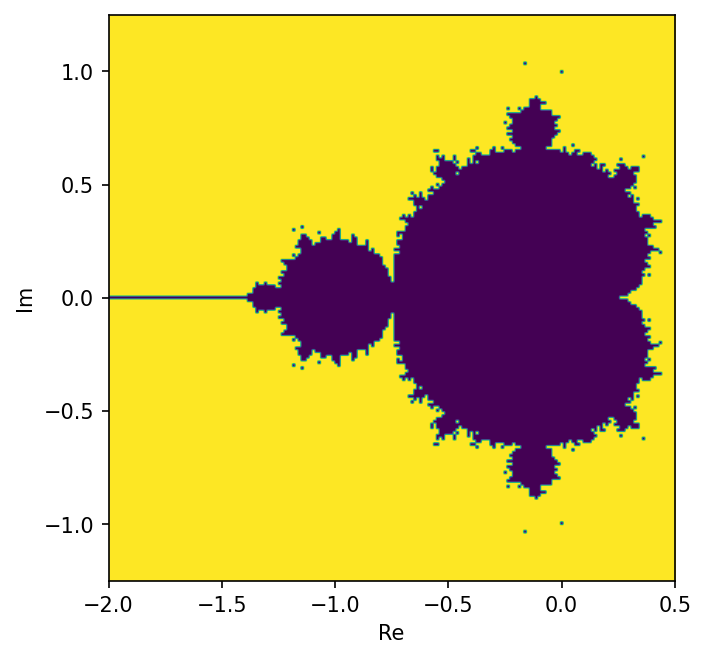

In [66]:
N = 201
xmin = -2
xmax = 0.5
ymin = -1.25
ymax = 1.25
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])
n_max = 50
z_limit = 50

for i in trange(N):
    for j in range(N):
        result[i,j] = testDiverge(x[i],y[j], n_max, z_limit, False) < n_max

plt.figure(dpi = 150)
plt.imshow(result.T, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

(5) Now we want to make the colors a bit more appealing. In cases, where the series zn does not diverge, fill the matrix with nmax instead of 0. In cases where it diverges at some iteration $n<n_{max}$, fill the matrix with n. Does that look better?

100%|██████████| 201/201 [00:00<00:00, 1360.01it/s]


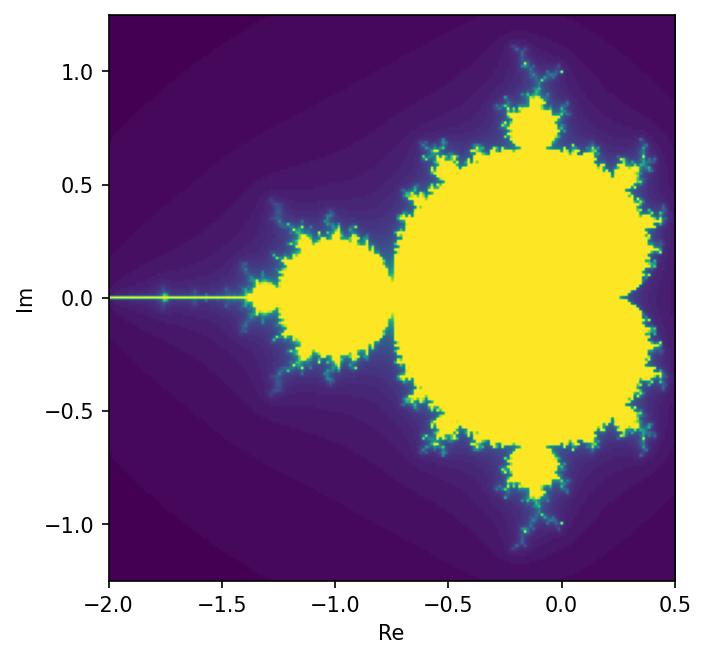

In [67]:
N = 201
xmin = -2
xmax = 0.5
ymin = -1.25
ymax = 1.25
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])
n_max = 50
z_limit = 50

for i in trange(N):
    for j in range(N):
        result[i,j] = testDiverge(x[i],y[j], n_max, z_limit, False)

plt.figure(dpi = 150)
plt.imshow(result.T, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

(6) Zoom into the interval $–0.8<x<–0.7$ and $0.05<y<0.15$ and run the code again. Now increase the number of iterations nmax first to 75 and later to 100. What change do you see in the resulting image?

100%|██████████| 1001/1001 [00:11<00:00, 89.50it/s]


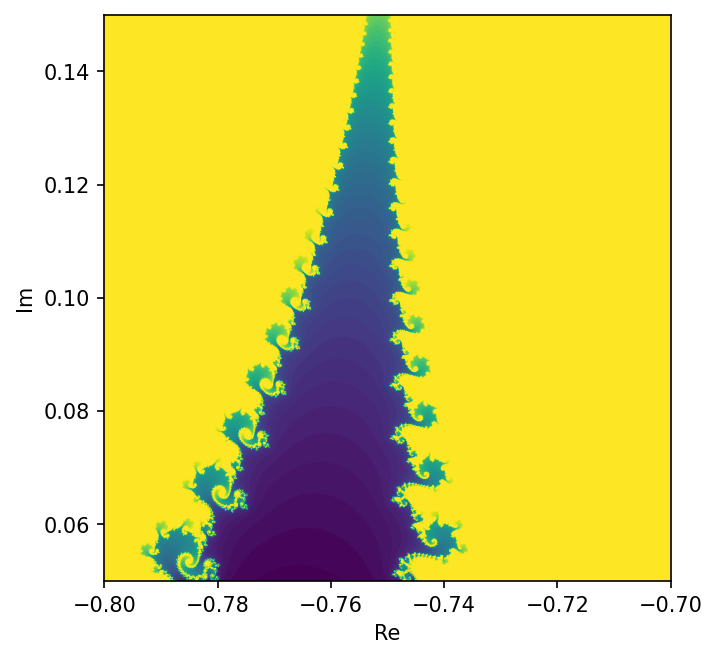

In [68]:
N = 1001
xmin = -0.8
xmax = -0.7
ymin = 0.05
ymax = 0.15
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])
n_max = 75
z_limit = 50

for i in trange(N):
    for j in range(N):
        result[i,j] = testDiverge(x[i],y[j], n_max, z_limit, False)

plt.figure(dpi = 150)
plt.imshow(result.T, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

100%|██████████| 1001/1001 [00:13<00:00, 72.02it/s]


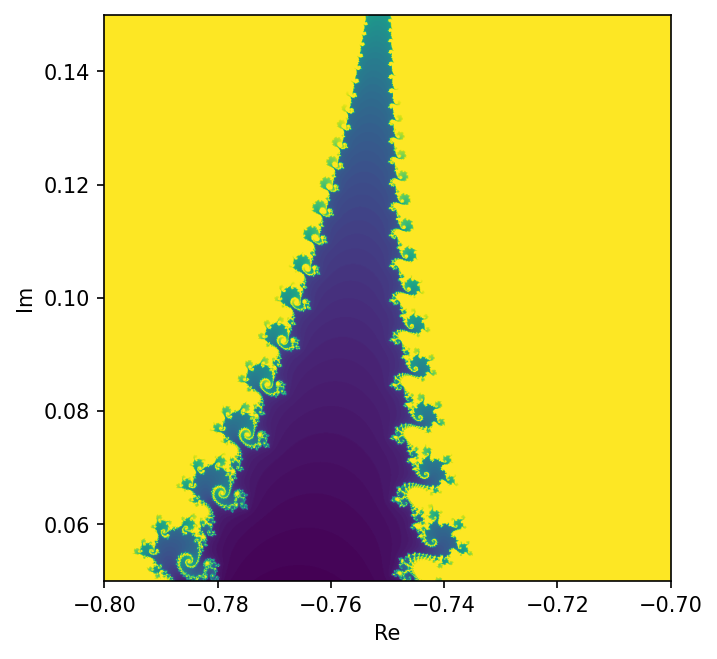

In [69]:
N = 1001
xmin = -0.8
xmax = -0.7
ymin = 0.05
ymax = 0.15
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])
n_max = 100
z_limit = 50

for i in trange(N):
    for j in range(N):
        result[i,j] = testDiverge(x[i],y[j], n_max, z_limit, False)

plt.figure(dpi = 150)
plt.imshow(result.T, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

(7) Now zoom in further step by step until the size of the x and y intervals are only 0.001 or less. Adjust $n_{max}$ as needed. Get lost in the neverworld of fractals. Save the image file and the parameters for the most beautiful image you obtained!

100%|██████████| 1001/1001 [00:31<00:00, 32.01it/s]


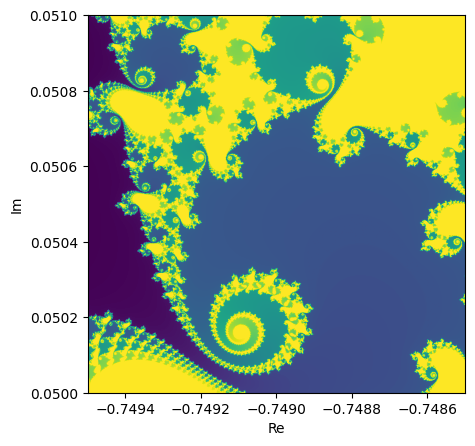

In [70]:
N = 1001
xmin = -0.75+0.0005
xmax = -0.749+0.0005
ymin = 0.05
ymax = 0.051
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])
n_max = 300
z_limit = 50

for i in trange(N):
    for j in range(N):
        result[i,j] = testDiverge(x[i],y[j], n_max, z_limit, False)

plt.figure(dpi = 100)
plt.imshow(result.T, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

(8) Finally, run your code with only N=201 grid points and try these magic commands (Replace A
by the name of your matrix):

100%|██████████| 201/201 [00:00<00:00, 1342.02it/s]


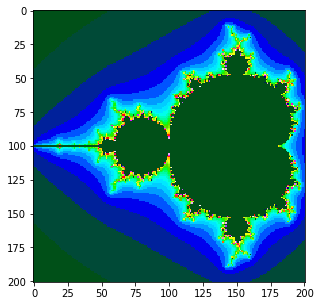

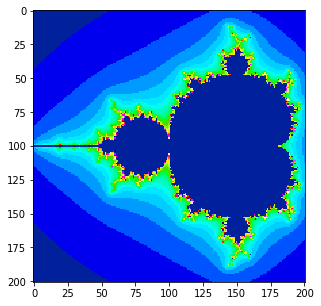

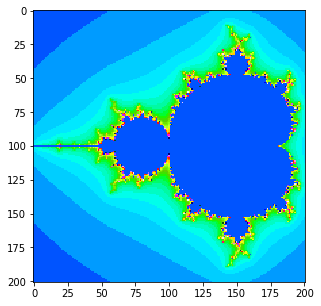

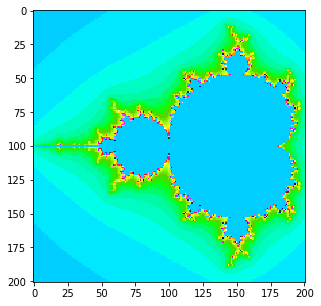

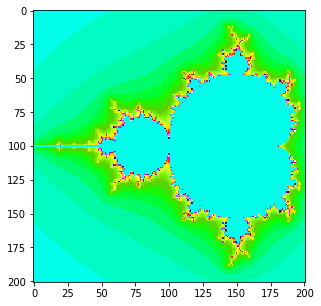

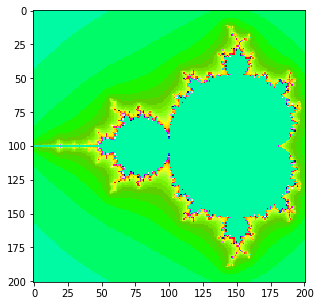

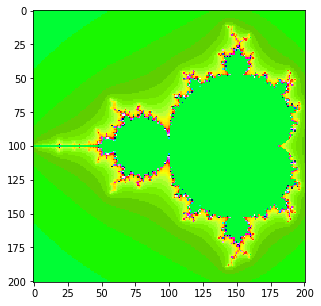

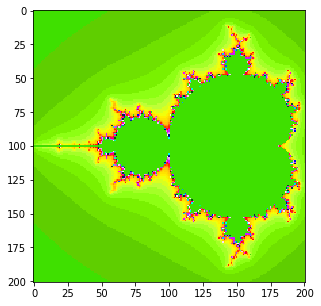

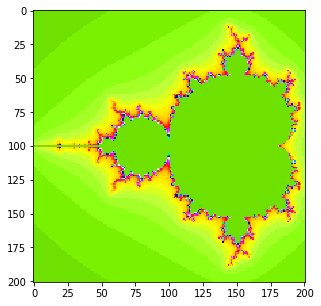

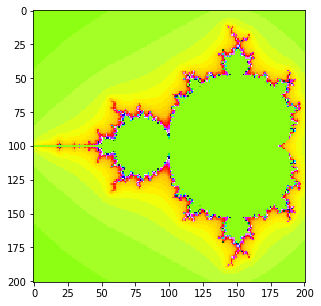

In [71]:
N = 201
xmin = -2
xmax = 0.5
ymin = -1.25
ymax = 1.25
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])
n_max = 50
z_limit = 50

for i in trange(N):
    for j in range(N):
        result[i,j] = testDiverge(x[i],y[j], n_max, z_limit, False)

result = result.T

plt.rcParams['figure.figsize'] = [5, 5]
from matplotlib import cm
min = result.min()
result -= min
max = result.max()
for i in range(10):
    result = (result + 2) % max;
    plt.imshow(result,cmap='gist_ncar', interpolation='nearest',animated=True)
    plt.draw()
    plt.pause(0.2)

# Reference:
https://youtu.be/gECmGwD0DaI